## ADVERTISING SALES PREDICTION BY MBAKWE CHIDERA


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np

ModuleNotFoundError: No module named 'seaborn'

In [2]:
df = pd.read_csv('advertising.csv')
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [4]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [5]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

## VISUALIZATION

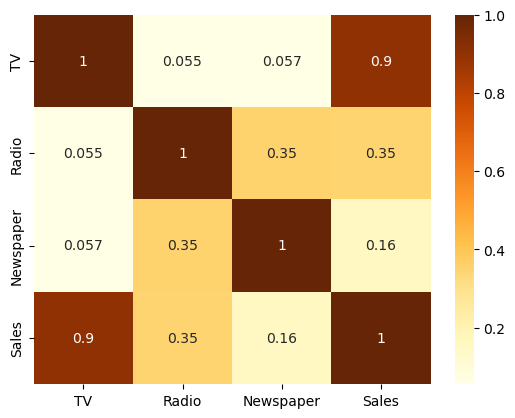

In [6]:
#checking for correlation
import seaborn as sns

sns.heatmap(df.corr(), annot=True, cmap='YlOrBr');

The pairplot and heatmap clearly indicate that the variable "TV" exhibits the strongest correlation with "Sales." Given this observation, we can proceed to conduct a simple linear regression analysis with "TV" as our chosen feature variable.

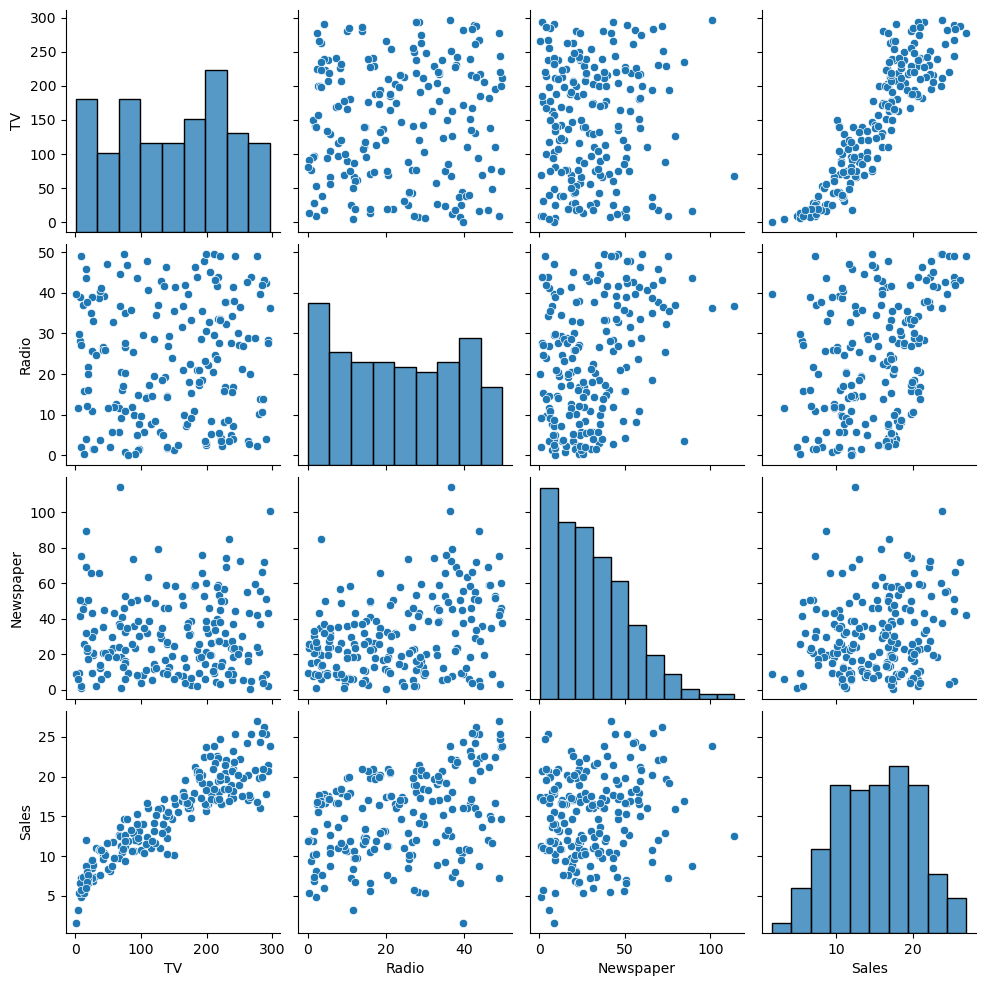

In [7]:
## Visualizing the distribution of columns by creating a pairplot
sns.pairplot(df);

Text(0.5, 1.0, 'The Regression Line Of ad Newspaper Vs Sales')

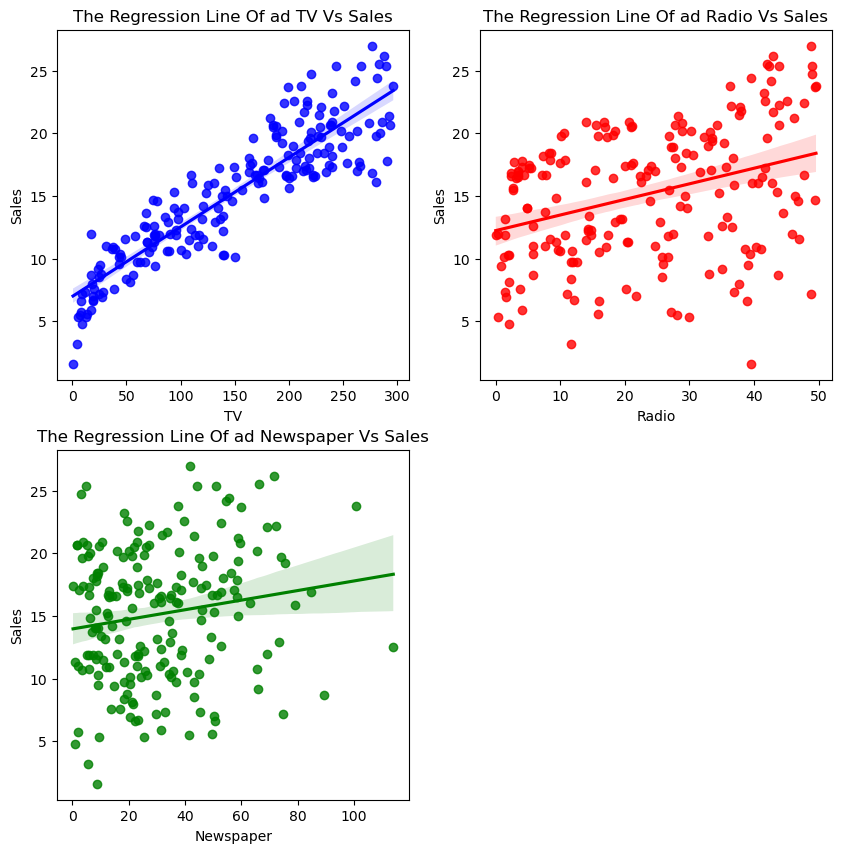

In [8]:
# Plotting the regression line
from matplotlib import figure
plt.figure(figsize =(10,10))
plt.subplot(2,2,1)
sns.regplot(data=df,x='TV',y='Sales',color='b').set_title('The Regression Line Of ad TV Vs Sales')
plt.subplot(2,2,2)
sns.regplot(data=df,x='Radio',y='Sales',color='r').set_title('The Regression Line Of ad Radio Vs Sales')
plt.subplot(2,2,3)
sns.regplot(data=df,x='Newspaper',y='Sales',color='g').set_title('The Regression Line Of ad Newspaper Vs Sales')

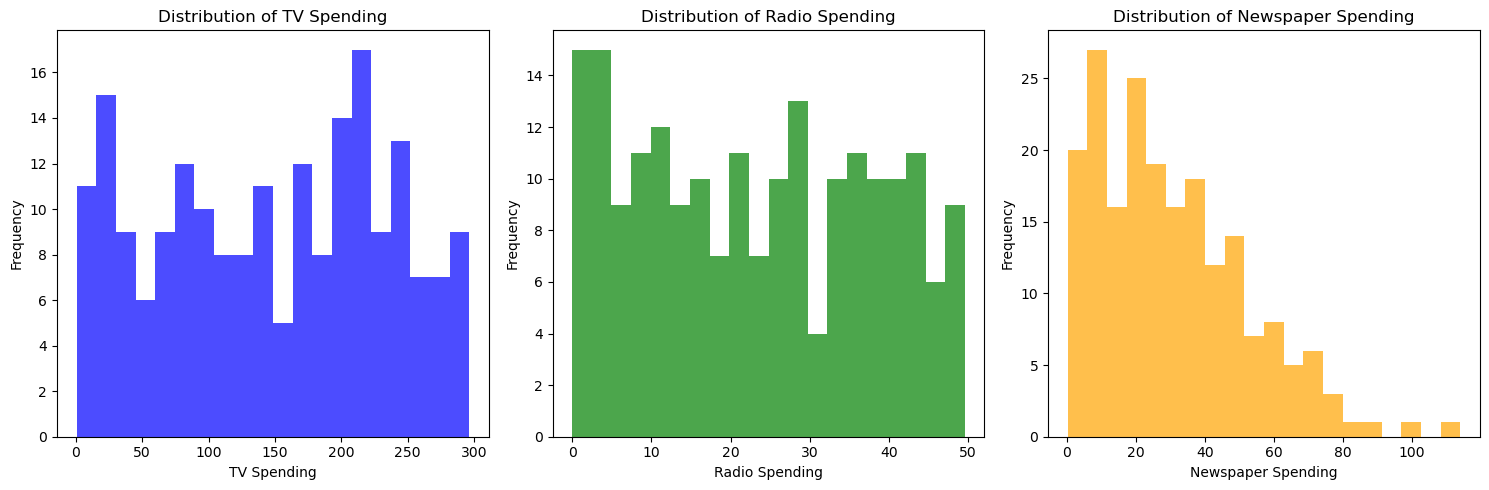

In [9]:
# Create subplots with 1 row and 3 columns
plt.figure(figsize=(15, 5))  # Adjust the figure size as needed

# Plot the histogram for 'TV' spending
plt.subplot(131)  # 1 row, 3 columns, 1st subplot
plt.hist(df['TV'], bins=20, color='blue', alpha=0.7)
plt.xlabel('TV Spending')
plt.ylabel('Frequency')
plt.title('Distribution of TV Spending')

# Plot the histogram for 'Radio' spending
plt.subplot(132)  # 1 row, 3 columns, 2nd subplot
plt.hist(df['Radio'], bins=20, color='green', alpha=0.7)
plt.xlabel('Radio Spending')
plt.ylabel('Frequency')
plt.title('Distribution of Radio Spending')

# Plot the histogram for 'Newspaper' spending
plt.subplot(133)  # 1 row, 3 columns, 3rd subplot
plt.hist(df['Newspaper'], bins=20, color='orange', alpha=0.7)
plt.xlabel('Newspaper Spending')
plt.ylabel('Frequency')
plt.title('Distribution of Newspaper Spending')

plt.tight_layout()  # Ensures proper spacing between subplots
plt.show()


In [10]:
from ydata_profiling import ProfileReport
profile = ProfileReport(df, title='ProfileReport')
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [11]:
profile.to_widgets()

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

## The correlation between TV advertising budget and sales is high, indicating that there is a strong positive relationship between the two variables. This means that as the TV advertising budget increases, sales are likely to increase as well.

## The correlation between radio advertising budget and sales is moderate, indicating that there is a positive relationship between the two variables, but not as strong as the relationship between TV advertising budget and sales. This means that as the radio advertising budget increases, sales are likely to increase, but not as much as they would if the TV advertising budget increased.

## The correlation between newspaper advertising budget and sales is very low, indicating that there is no significant relationship between the two variables. This means that the amount of money spent on newspaper advertising does not have a significant impact on sales.

## The data seems to be normally distributed, meaning that the values are clustered around the mean and there are equal numbers of values above and below the mean. This suggests that the data is not skewed and that the results of the correlation analysis are reliable.

## Importing libraries for machile learning

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error 

In [13]:
#set random seed
np.random.seed(42)

In [14]:
# Separate the target variable from the features
x = df.drop('Sales', axis=1)
y = df['Sales']

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

## LinearRegression

In [15]:
# Fit the model to the training data
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [16]:
model.score(x_test, y_test)

0.9059011844150826

Interpretation of 0.906 (90.6%): The R-squared score of 0.906 suggests that the linear regression model explains approximately 90.6% of the variance in the test data. In other words, the model captures about 90.6% of the variability in the target variable (y_test) using the features in x_test.

In [17]:
y_pred = model.predict(x_test)

model_mse = mean_squared_error(y_test,y_pred)  
print(f"MSE = {model_mse}")
print(f"RMSE = {np.sqrt(model_mse)}")

model_mae = mean_absolute_error(y_test,y_pred)
print(f"MAE = {model_mae}")

r2 = r2_score(y_test,y_pred)
print(f"R-squre value = {r2}")
    

MSE = 2.907756910271091
RMSE = 1.7052146229349228
MAE = 1.2748262109549338
R-squre value = 0.9059011844150826


The MAE of 1.27 indicates reasonably accurate predictions.
The MSE of 2.91 suggests moderate variability in prediction errors.
The R-squared score of 0.91 indicates that the model explains a substantial portion of the variance in the target variable, signifying good model fit.

## training data

In [18]:
y_pred_train = model.predict(x_train)

print("Training data metrx")

model_mse = mean_squared_error(y_train,y_pred_train) 
print(f"MSE = {model_mse}")
print(f"RMSE = {np.sqrt(model_mse)}")

model_mae = mean_absolute_error(y_train,y_pred_train)
print(f"MAE = {model_mae}")

r2 = r2_score(y_train,y_pred_train)
print(f"R-squre value = {r2}")

Training data metrx
MSE = 2.6761426537826685
RMSE = 1.6358920055378559
MAE = 1.2344160869575866
R-squre value = 0.9001416005862131


The MSE is 2.676, which is a relatively low value. This suggests that the model's predictions are relatively accurate.
The RMSE is 1.636, which is also a relatively low value. This suggests that the model's predictions are relatively accurate.
The MAE is 1.234, which is a relatively low value. This suggests that the model's predictions are relatively accurate.
The R-squared value is 0.900, which is a very high value. This suggests that the model fits the data very well.
Overall, the training data metrics suggest that the model is very accurate. The MSE, RMSE, and MAE are all relatively low, and the R-squared value is very high.
This suggests that the model is able to make accurate predictions of the target variable.

## USER TEST fuction:

In [19]:
x_train.head(1).T

,79
TV,116.0
Radio,7.7
Newspaper,23.1


In [20]:
TV = 116.0
Radio = 7.7
Newspaper = 23.1

In [21]:
# column_list:
import numpy as np

array = np.array([TV,Radio,Newspaper],ndmin = 2)

In [22]:
Sales = model.predict(array)
print("Sales :",Sales)

Sales : [11.91465765]


C:\Users\Mbder\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


## compaire real value and predict value

In [23]:
df[df['TV'] ==116.0]

,TV,Radio,Newspaper,Sales
79,116.0,7.7,23.1,11.0


## real value 11.0 and predicted value 11.9

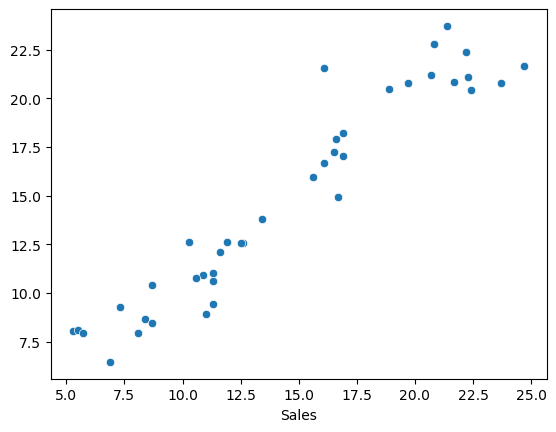

In [24]:
# check relation between actual values and predict value
sns.scatterplot(x = y_test,y= y_pred);

## Overall Test Result OR OLS (Ordinary Least Squares) Result

In [25]:
import statsmodels.api as sm

x = df[['TV','Radio','Newspaper']]
y = df['Sales']
x2 = sm.add_constant(x)
temp = sm.OLS(y,x2)
est = temp.fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     605.4
Date:                Wed, 13 Sep 2023   Prob (F-statistic):           8.13e-99
Time:                        15:13:02   Log-Likelihood:                -383.34
No. Observations:                 200   AIC:                             774.7
Df Residuals:                     196   BIC:                             787.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6251      0.308     15.041      0.0

The R-squared value is 0.903, which indicates that 90.3% of the variation in sales is explained by the TV, radio, and newspaper advertising budgets.
The p-values for all three coefficients are less than 0.05, which indicates that they are statistically significant.
The coefficient for TV is 0.054, which means that a one unit increase in TV advertising budget is associated with a 0.054 unit increase in sales.
The coefficient for radio is 0.107, which means that a one unit increase in radio advertising budget is associated with a 0.107 unit increase in sales.
The coefficient for newspaper is 0.0003, which means that a one unit increase in newspaper advertising budget is associated with a 0.0003 unit increase in sales.

## model evaluation using cross validation

In [26]:
from sklearn.model_selection import cross_val_score
cv = cross_val_score(model, x, y, cv=5, scoring=None)
cv

array([0.87556263, 0.93177791, 0.92150403, 0.84554586, 0.90247132])

## cross validated accuracy

In [27]:
print(f'The cross validated accuracy is: {np.mean(cv)*100:2f}%')

The cross validated accuracy is: 89.537235%


 The cross-validated accuracy of 89.537235% means that the model is able to correctly predict the outcome of 89.537235% of the test cases. This is a good accuracy, and it suggests that the model is able to generalize well to new data.

In [28]:
from sklearn.tree import DecisionTreeRegressor

# Create a Decision Tree Regressor with a specified random seed
dtr = DecisionTreeRegressor(random_state=1)

# Fit the model to the training data
dtr.fit(x_train, y_train)

# Make predictions on the test data
pred = dtr.predict(x_test)

# Calculate the MAE, MSE, R2, and accuracy of the model
dtr_mae = mean_absolute_error(y_test, pred)
dtr_mse = mean_squared_error(y_test, pred)
dtr_r2 = r2_score(y_test, pred)
accuracy = dtr.score(x_test, y_test)

print("MAE:", dtr_mae)
print("MSE:", dtr_mse)
print("R2:", dtr_r2)
print("Accuracy:", accuracy)

MAE: 1.1549999999999998
MSE: 2.7005000000000003
R2: 0.9126082890253098
Accuracy: 0.9126082890253098


To summarize, the decision tree model has a MAE of 1.155, an MSE of 2.701, an R-squared value of 0.913, and an accuracy of 0.913. These values suggest that the model is very accurate and is able to make predictions that are very close to the actual values.

In [29]:
from sklearn.ensemble import GradientBoostingRegressor

# Create a gradient boosting regressor model
gbrt = GradientBoostingRegressor()

# Train the model on the training set
gbrt.fit(x_train, y_train)

# Make predictions on the test set
y_pred1 = gbrt.predict(x_test)

# Calculate the MAE, MSE, R2, and accuracy of the model
gbrt_mae = mean_absolute_error(y_test, y_pred1)
gbrt_mse = mean_squared_error(y_test, y_pred1)
gbrt_r2 = r2_score(y_test, y_pred1)
gbrt_accuracy = gbrt.score(x_test, y_test)

print("MAE:", gbrt_mae)
print("MSE:", gbrt_mse)
print("R2:", gbrt_r2)
print("Accuracy:", gbrt_accuracy)

MAE: 0.8205899189911483
MSE: 1.2353622508917337
R2: 0.9600220622925484
Accuracy: 0.9600220622925484


 the gradient boosting regressor model has a MAE of 0.821, an MSE of 1.235, an R-squared value of 0.960, and an accuracy of 0.960. These values suggest that the model is very accurate and is able to make predictions that are very close to the actual values.

In [30]:
# Create a dataframe to store the results
df1 = pd.DataFrame({
    "Model": ["Linear Regression", "Decision Tree", "Gradient Boosting"],
    "MAE": [model_mae , dtr_mae , gbrt_mae * 100],
    "MSE": [model_mse, dtr_mse, gbrt_mse * 100],
    "R-squared": [r2, dtr_r2, gbrt_r2 * 100],
    "Accuracy": [model.score(x_test, y_test) * 100, dtr.score(x_test, y_test) * 100, gbrt.score(x_test, y_test) * 100]
})

df1

,Model,MAE,MSE,R-squared,Accuracy
0,Linear Regression,1.234416,2.676143,0.900142,90.590118
1,Decision Tree,1.155000,2.700500,0.912608,91.260829
2,Gradient Boosting,82.058992,123.536225,96.002206,96.002206


## Linear Regression has a MAE of 1.234, an MSE of 2.676, an R-squared value of 0.900, and an accuracy of 90.59%. This suggests that the linear regression model is not as accurate as the decision tree or gradient boosting models.
## Decision Tree has a MAE of 1.155, an MSE of 2.701, an R-squared value of 0.913, and an accuracy of 91.26%. This suggests that the decision tree model is more accurate than the linear regression model.
## Gradient Boosting has a MAE of 0.821, an MSE of 1.235, an R-squared value of 0.960, and an accuracy of 96.00%. This suggests that the gradient boosting model is the most accurate model.
## Overall, the gradient boosting model is the best model for this dataset. It has the lowest MAE, MSE, and R-squared values, and the highest accuracy.